<a href="https://colab.research.google.com/github/AbhiJeet70/PoisonAirport/blob/main/Poison_Air.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processing country: USA
Statistics for USA:
  Number of nodes: 1190
  Number of edges: 13599
  Number of features: 1190
  Number of classes: 4
  Class distribution: [297 297 297 299]
Training with GCNNet, lr=0.01, weight_decay=0.0001
Early stopping at epoch 251
Training with GCNNet, lr=0.01, weight_decay=1e-05
Early stopping at epoch 116
Training with GCNNet, lr=0.05, weight_decay=0.0001
Early stopping at epoch 131
Training with GCNNet, lr=0.05, weight_decay=1e-05
Early stopping at epoch 202
Training with GCNNet, lr=0.005, weight_decay=0.0001
Early stopping at epoch 168
Training with GCNNet, lr=0.005, weight_decay=1e-05
Early stopping at epoch 145
Training with GCNNet, lr=0.001, weight_decay=0.0001
Early stopping at epoch 157
Training with GCNNet, lr=0.001, weight_decay=1e-05
Early stopping at epoch 112
Training with GCNNet, lr=0.0005, weight_decay=0.0001
Early stopping at epoch 101
Training with GCNNet, lr=0.0005, weight_decay=1e-05
Early stopping at epoch 123
Training with GCNNet, lr

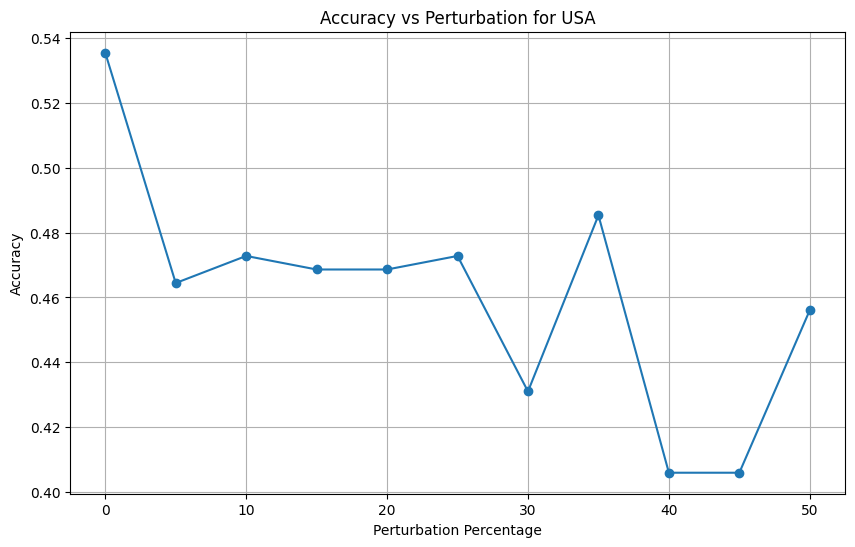

Processing country: Brazil
Statistics for Brazil:
  Number of nodes: 131
  Number of edges: 1074
  Number of features: 131
  Number of classes: 4
  Class distribution: [32 32 32 35]
Training with GCNNet, lr=0.01, weight_decay=0.0001
Early stopping at epoch 171
Training with GCNNet, lr=0.01, weight_decay=1e-05
Early stopping at epoch 160
Training with GCNNet, lr=0.05, weight_decay=0.0001
Early stopping at epoch 125
Training with GCNNet, lr=0.05, weight_decay=1e-05
Early stopping at epoch 162
Training with GCNNet, lr=0.005, weight_decay=0.0001
Early stopping at epoch 177
Training with GCNNet, lr=0.005, weight_decay=1e-05
Early stopping at epoch 114
Training with GCNNet, lr=0.001, weight_decay=0.0001
Early stopping at epoch 103
Training with GCNNet, lr=0.001, weight_decay=1e-05
Early stopping at epoch 170
Training with GCNNet, lr=0.0005, weight_decay=0.0001
Early stopping at epoch 101
Training with GCNNet, lr=0.0005, weight_decay=1e-05
Early stopping at epoch 101
Training with GCNNet, lr=

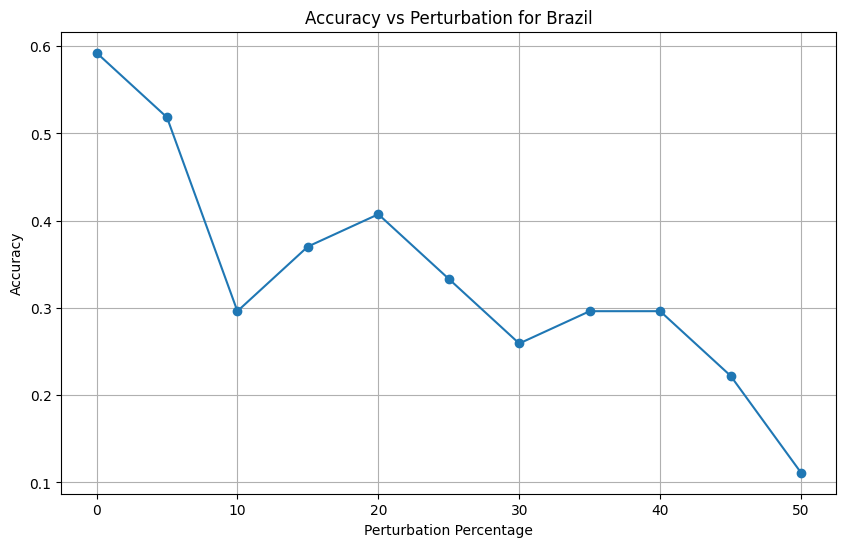

Processing country: Europe
Statistics for Europe:
  Number of nodes: 399
  Number of edges: 5995
  Number of features: 399
  Number of classes: 4
  Class distribution: [ 99  99  99 102]
Training with GCNNet, lr=0.01, weight_decay=0.0001
Early stopping at epoch 107
Training with GCNNet, lr=0.01, weight_decay=1e-05
Early stopping at epoch 107
Training with GCNNet, lr=0.05, weight_decay=0.0001
Early stopping at epoch 108
Training with GCNNet, lr=0.05, weight_decay=1e-05
Early stopping at epoch 120
Training with GCNNet, lr=0.005, weight_decay=0.0001
Early stopping at epoch 104
Training with GCNNet, lr=0.005, weight_decay=1e-05
Early stopping at epoch 101
Training with GCNNet, lr=0.001, weight_decay=0.0001
Early stopping at epoch 101
Training with GCNNet, lr=0.001, weight_decay=1e-05
Early stopping at epoch 107
Training with GCNNet, lr=0.0005, weight_decay=0.0001
Early stopping at epoch 101
Training with GCNNet, lr=0.0005, weight_decay=1e-05
Early stopping at epoch 160
Training with GCNNet,

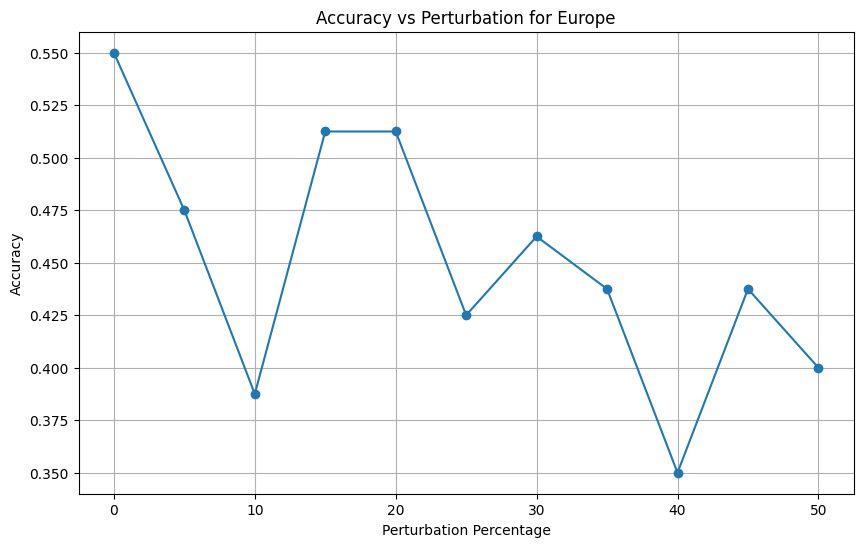

In [ ]:
!pip install torch torch_geometric
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Airports
from torch_geometric.transforms import NormalizeFeatures
from torch_geometric.nn import GCNConv
import numpy as np
import random
import matplotlib.pyplot as plt

# Set random seed for reproducibility
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

set_seed(20)

# Define function to load Airports data for a given country
def load_airports_data(country):
    dataset = Airports(root='/tmp/Airports', name=country, transform=NormalizeFeatures())
    data = dataset[0]
    return data

# Split data into train, validation, and test sets
def split_indices(num_nodes, train_ratio=0.7, val_ratio=0.1):
    indices = np.random.permutation(num_nodes)
    train_end = int(train_ratio * num_nodes)
    val_end = int((train_ratio + val_ratio) * num_nodes)
    train_idx = torch.tensor(indices[:train_end], dtype=torch.long)
    val_idx = torch.tensor(indices[train_end:val_end], dtype=torch.long)
    test_idx = torch.tensor(indices[val_end:], dtype=torch.long)
    return train_idx, val_idx, test_idx

# Define the GCN model with increased complexity and batch normalization
class GCNNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCNNet, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.conv4 = GCNConv(hidden_channels, hidden_channels)
        self.conv5 = GCNConv(hidden_channels, out_channels)
        self.bn1 = torch.nn.BatchNorm1d(hidden_channels)
        self.bn2 = torch.nn.BatchNorm1d(hidden_channels)
        self.bn3 = torch.nn.BatchNorm1d(hidden_channels)
        self.bn4 = torch.nn.BatchNorm1d(hidden_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        x = self.conv3(x, edge_index)
        x = self.bn3(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        x = self.conv4(x, edge_index)
        x = self.bn4(x)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        x = self.conv5(x, edge_index)
        return F.log_softmax(x, dim=1)

# Train and evaluate the model
def train_model(model, pyg_data, lr, weight_decay):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    pyg_data = pyg_data.to(device)
    model = model.to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_acc = 0
    patience = 100
    patience_counter = 0

    for epoch in range(1, 501):
        model.train()
        optimizer.zero_grad()
        out = model(pyg_data.x, pyg_data.edge_index)
        loss = F.cross_entropy(out[pyg_data.train_mask], pyg_data.y[pyg_data.train_mask])
        loss.backward()
        optimizer.step()

        model.eval()
        _, pred = model(pyg_data.x, pyg_data.edge_index).max(dim=1)
        val_correct = float(pred[pyg_data.val_mask].eq(pyg_data.y[pyg_data.val_mask]).sum().item())
        val_acc = val_correct / pyg_data.val_mask.sum().item()

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
            best_model_state = model.state_dict()
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch}')
            break

    model.load_state_dict(best_model_state)
    model.eval()
    _, pred = model(pyg_data.x, pyg_data.edge_index).max(dim=1)
    correct = float(pred[pyg_data.test_mask].eq(pyg_data.y[pyg_data.test_mask]).sum().item())
    acc = correct / pyg_data.test_mask.sum().item()
    return acc

# Print dataset statistics
def print_dataset_statistics(data, country):
    num_nodes = data.num_nodes
    num_edges = data.num_edges
    num_features = data.num_node_features
    num_classes = data.y.max().item() + 1
    class_distribution = torch.bincount(data.y).cpu().numpy()
    print(f"Statistics for {country}:")
    print(f"  Number of nodes: {num_nodes}")
    print(f"  Number of edges: {num_edges}")
    print(f"  Number of features: {num_features}")
    print(f"  Number of classes: {num_classes}")
    print(f"  Class distribution: {class_distribution}")

# Find nodes with the most and fewest degrees
def find_extreme_degree_nodes(edge_index, num_nodes, top_k=20):
    degrees = torch.zeros(num_nodes, dtype=torch.long)
    degrees.scatter_add_(0, edge_index[0], torch.ones(edge_index.size(1), dtype=torch.long))

    top_k_nodes = torch.topk(degrees, top_k).indices
    bottom_k_nodes = torch.topk(degrees, top_k, largest=False).indices
    top_k_degrees = degrees[top_k_nodes]
    bottom_k_degrees = degrees[bottom_k_nodes]

    return top_k_nodes, top_k_degrees, bottom_k_nodes, bottom_k_degrees

# Perturb edges of specified nodes
def perturb_edges(data, nodes, perturbation_percentage):
    edge_index = data.edge_index.clone()
    num_edges = edge_index.size(1)
    num_perturbations = int(num_edges * perturbation_percentage)

    for node in nodes:
        connected_edges = (edge_index[0] == node) | (edge_index[1] == node)
        num_node_edges = connected_edges.sum().item()
        num_perturb_node_edges = int(num_node_edges * perturbation_percentage)

        if num_perturb_node_edges > 0:
            perturb_edges_idx = torch.nonzero(connected_edges, as_tuple=False).view(-1)
            perturb_edges_idx = perturb_edges_idx[torch.randperm(perturb_edges_idx.size(0))[:num_perturb_node_edges]]
            edge_index[:, perturb_edges_idx] = torch.randint(0, data.num_nodes, edge_index[:, perturb_edges_idx].shape, dtype=torch.long)

    data.edge_index = edge_index
    return data

# Hyperparameter grid search
hidden_channels_list = [64, 128, 256, 512]
learning_rates = [0.01, 0.05, 0.005, 0.001, 0.0005]
weight_decays = [1e-4, 1e-5]

# List of countries to process
countries = ['USA', 'Brazil', 'Europe']

# Process each country and print accuracies
for country in countries:
    print(f'Processing country: {country}')
    data = load_airports_data(country)

    # Print dataset statistics
    print_dataset_statistics(data, country)

    # Prepare the masks
    train_idx, val_idx, test_idx = split_indices(data.num_nodes)
    data.train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
    data.val_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
    data.test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
    data.train_mask[train_idx] = True
    data.val_mask[val_idx] = True
    data.test_mask[test_idx] = True

    best_acc = 0
    best_params = None

    models = [GCNNet(data.num_node_features, hidden_channels, data.y.max().item() + 1) for hidden_channels in hidden_channels_list]
    for model in models:
        for lr in learning_rates:
            for weight_decay in weight_decays:
                print(f'Training with {model.__class__.__name__}, lr={lr}, weight_decay={weight_decay}')
                clean_acc = train_model(model, data, lr, weight_decay)
                if clean_acc > best_acc:
                    best_acc = clean_acc
                    best_params = (model.__class__.__name__, model, lr, weight_decay)

    print(f'Clean accuracy for {country}: {best_acc:.4f} with params {best_params}')

    # Store accuracies for plotting
    perturbation_percentages = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.30, 0.35, 0.4, 0.45, 0.5]
    accuracies = [best_acc]

    for perturbation_percentage in perturbation_percentages[1:]:
        # Load data again to avoid perturbing already perturbed data
        data = load_airports_data(country)

        # Prepare the masks again
        data.train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
        data.val_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
        data.test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
        data.train_mask[train_idx] = True
        data.val_mask[val_idx] = True
        data.test_mask[test_idx] = True

        # Find top and bottom degree nodes
        top_k_nodes, top_k_degrees, bottom_k_nodes, bottom_k_degrees = find_extreme_degree_nodes(data.edge_index, data.num_nodes)

        print(f"Top {top_k_nodes.size(0)} nodes with the most degrees in {country}:")
        for i in range(top_k_nodes.size(0)):
            print(f"  Node {top_k_nodes[i].item()} with degree {top_k_degrees[i].item()}")

        print(f"Top {bottom_k_nodes.size(0)} nodes with the fewest degrees in {country}:")
        for i in range(bottom_k_nodes.size(0)):
            print(f"  Node {bottom_k_nodes[i].item()} with degree {bottom_k_degrees[i].item()}")

        # Perturb edges of top degree nodes
        data = perturb_edges(data, top_k_nodes, perturbation_percentage=perturbation_percentage)

        worst_acc = 1

        for model in models:
            print(f'Training with {model.__class__.__name__}, lr={best_params[2]}, weight_decay={best_params[3]} for perturbation {perturbation_percentage*100}%')
            perturbed_acc = train_model(model, data, best_params[2], best_params[3])
            if perturbed_acc < worst_acc:
                worst_acc = perturbed_acc

        print(f'Worst accuracy after perturbing {perturbation_percentage*100}% edges for {country}: {worst_acc:.4f}')
        accuracies.append(worst_acc)

    # Plot accuracies
    plt.figure(figsize=(10, 6))
    plt.plot([0] + [p * 100 for p in perturbation_percentages[1:]], accuracies, marker='o')
    plt.xlabel('Perturbation Percentage')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Perturbation for {country}')
    plt.grid(True)
    plt.show()
